# Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




# Reading the Data

In [3]:
df = pd.read_csv("dataFiles/Ford.csv")
df = df.tail(3000)

# Basic Data Cleaning

In [4]:
df = df[['Date','Open','Close']]
df['Date'] = pd.to_datetime(df['Date'], utc = True)
df.info()
df['IntradayReturn'] = np.log(df['Close'] / df['Close'].shift(1))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 10359 to 13358
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    3000 non-null   datetime64[ns, UTC]
 1   Open    3000 non-null   float64            
 2   Close   3000 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 70.4 KB


In [151]:
# df = df.set_index('Date')
print(df.head())

# df.dropna(inplace=True)
# df.shape

                           Date       Open      Close  IntradayReturn
13059 2024-03-18 04:00:00+00:00  11.121034  11.157677             NaN
13060 2024-03-19 04:00:00+00:00  11.093553  11.267606        0.009804
13061 2024-03-20 04:00:00+00:00  11.230962  11.817244        0.047628
13062 2024-03-21 04:00:00+00:00  11.835565  11.835565        0.001549
13063 2024-03-22 04:00:00+00:00  11.789763  11.826406       -0.000774


# Calculating Return

In [5]:
df['LogClose'] = np.log(df['Close']) 
df['DailyReturn'] = df['Close'] / df['Close'].shift(1) - 1
df['Return'] =  df['Close'] - df['Open'] 
# df['LogReturn'] = np.log(df['Return']) 

df.head()
df3 = df

In [153]:
# df2 = df2.set_index('Date')
# df3 = df2.resample('ME').last()
# df3 = df2

In [6]:
df3.head()

,Date,Open,Close,IntradayReturn,LogClose,DailyReturn,Return
10359,2013-06-25 04:00:00+00:00,8.093987,8.159393,NaN,2.099170,NaN,0.065406
10360,2013-06-26 04:00:00+00:00,8.262951,8.333808,0.021151,2.120320,0.021376,0.070857
10361,2013-06-27 04:00:00+00:00,8.410116,8.530026,0.023272,2.143592,0.023545,0.119911
10362,2013-06-28 04:00:00+00:00,8.480973,8.431918,-0.011568,2.132024,-0.011502,-0.049055
10363,2013-07-01 04:00:00+00:00,8.508223,8.579080,0.017302,2.149327,0.017453,0.070857


In [7]:
df3.tail()

,Date,Open,Close,IntradayReturn,LogClose,DailyReturn,Return
13354,2025-05-21 04:00:00+00:00,10.66,10.4800,-0.022643,2.349469,-0.022388,-0.180000
13355,2025-05-22 04:00:00+00:00,10.48,10.4400,-0.003824,2.345645,-0.003817,-0.040000
13356,2025-05-23 04:00:00+00:00,10.30,10.3600,-0.007692,2.337952,-0.007663,0.059999
13357,2025-05-27 04:00:00+00:00,10.45,10.3100,-0.004838,2.333114,-0.004826,-0.139999
13358,2025-05-28 04:00:00+00:00,10.32,10.2244,-0.008337,2.324777,-0.008303,-0.095600


# Plots over time


<Axes: xlabel='Date', ylabel='Return'>

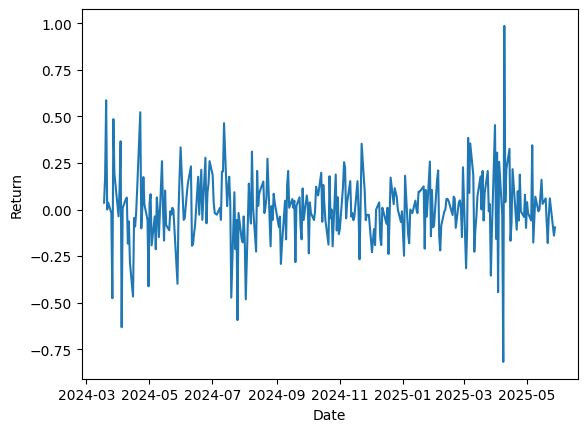

In [156]:
sns.lineplot(data = df3, x = "Date", y = "Return")

<Axes: xlabel='Date', ylabel='Return'>

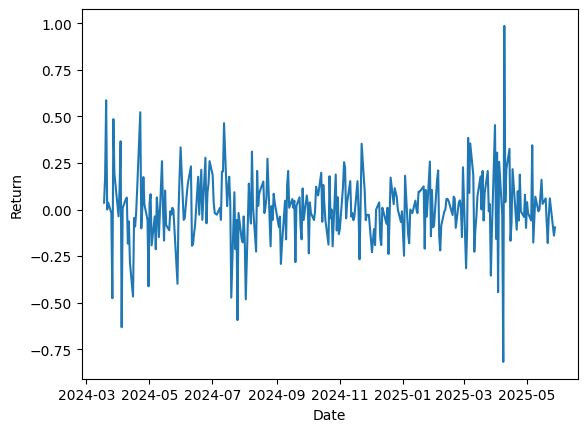

In [157]:
sns.lineplot(data = df3, x = "Date", y = "Return")

<Axes: xlabel='Date', ylabel='IntradayReturn'>

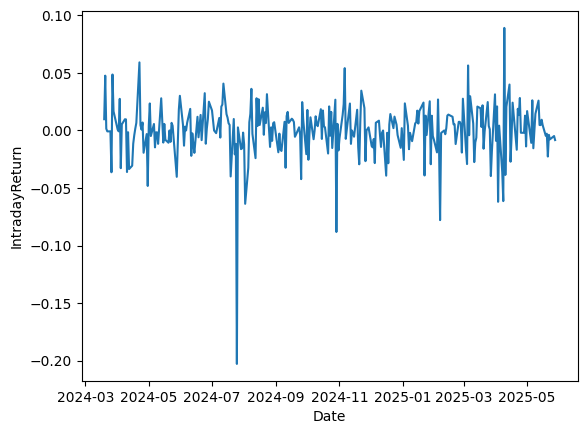

In [158]:
sns.lineplot(data=df3, x="Date", y="IntradayReturn")

<Axes: xlabel='Date', ylabel='Close'>

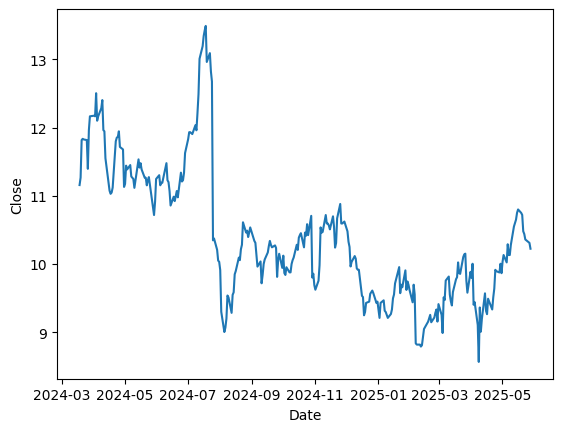

In [159]:
sns.lineplot(data=df3, x="Date", y="Close")

<Axes: xlabel='Date', ylabel='LogClose'>

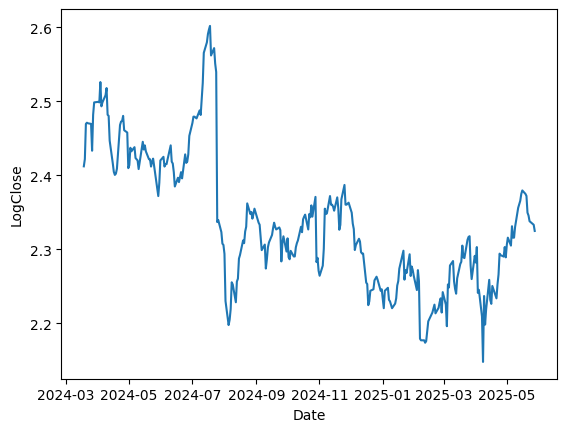

In [160]:
sns.lineplot(data=df3, x="Date", y="LogClose")

# ACF and PACF

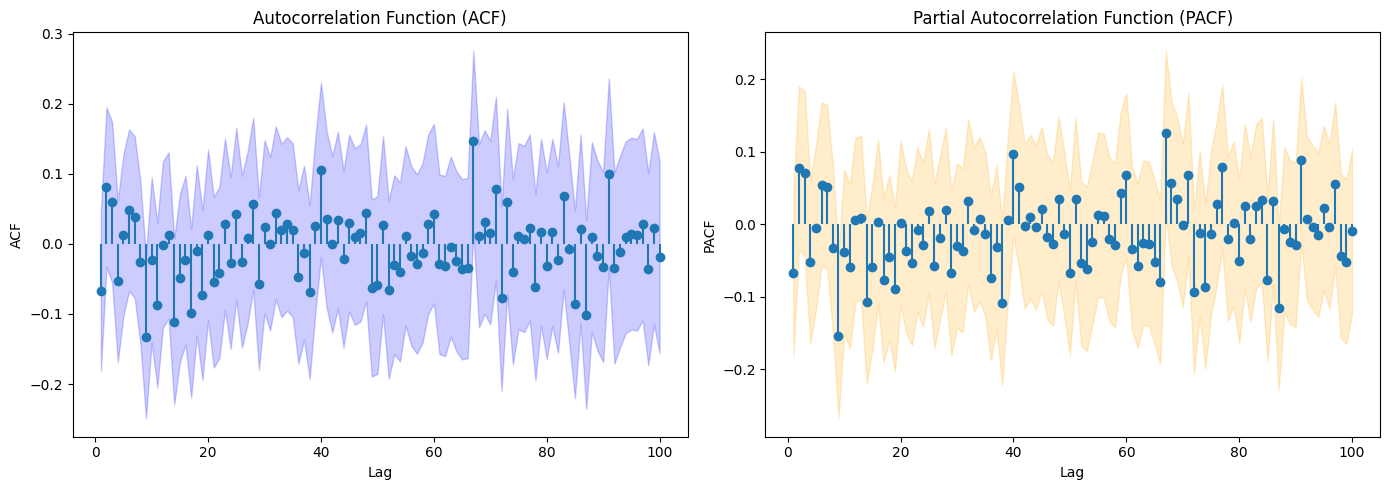

In [161]:
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import numpy as np

# Series without NaNs
series = df3['IntradayReturn'].dropna()

# Compute ACF and PACF with confidence intervals
acf_vals, acf_confint = acf(series, nlags=100, alpha=0.05)  # 95% CI
pacf_vals, pacf_confint = pacf(series, nlags=100, method='ywm', alpha=0.05)

# Exclude lag 0
lags = np.arange(1, 101)
acf_vals = acf_vals[1:]
acf_confint = acf_confint[1:]
pacf_vals = pacf_vals[1:]
pacf_confint = pacf_confint[1:]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF plot
axes[0].stem(lags, acf_vals, basefmt=" ")
axes[0].fill_between(lags, acf_confint[:, 0] - acf_vals + acf_vals, acf_confint[:, 1] - acf_vals + acf_vals, 
                     color='blue', alpha=0.2)
axes[0].set_title('Autocorrelation Function (ACF)')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('ACF')

# PACF plot
axes[1].stem(lags, pacf_vals, basefmt=" ")
axes[1].fill_between(lags, pacf_confint[:, 0] - pacf_vals + pacf_vals, pacf_confint[:, 1] - pacf_vals + pacf_vals, 
                     color='orange', alpha=0.2)
axes[1].set_title('Partial Autocorrelation Function (PACF)')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('PACF')

plt.tight_layout()
plt.show()


<Axes: xlabel='Date', ylabel='DailyReturn'>

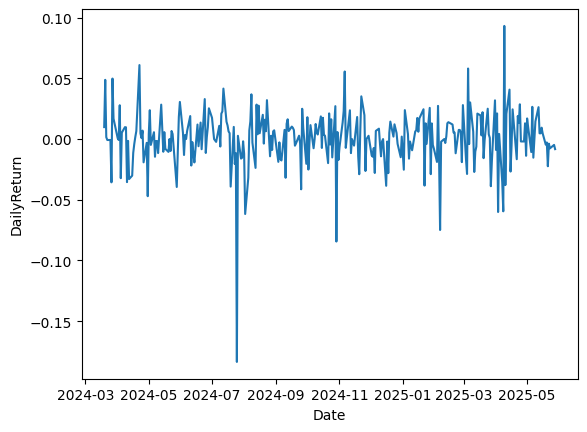

In [162]:
sns.lineplot(data = df3, x = "Date", y = "DailyReturn")

In [163]:
df.head(20)

,Date,Open,Close,IntradayReturn,LogClose,DailyReturn,Return
13059,2024-03-18 04:00:00+00:00,11.121034,11.157677,NaN,2.412128,NaN,0.036643
13060,2024-03-19 04:00:00+00:00,11.093553,11.267606,0.009804,2.421932,0.009852,0.174053
13061,2024-03-20 04:00:00+00:00,11.230962,11.817244,0.047628,2.469560,0.048780,0.586281
13062,2024-03-21 04:00:00+00:00,11.835565,11.835565,0.001549,2.471109,0.001550,0.000000
13063,2024-03-22 04:00:00+00:00,11.789763,11.826406,-0.000774,2.470335,-0.000774,0.036643
13064,2024-03-25 04:00:00+00:00,11.835565,11.817244,-0.000775,2.469560,-0.000775,-0.018322
13065,2024-03-26 04:00:00+00:00,11.872207,11.395853,-0.036310,2.433250,-0.035659,-0.476354
13066,2024-03-27 04:00:00+00:00,11.478300,11.963816,0.048637,2.481887,0.049839,0.485515
13067,2024-03-28 04:00:00+00:00,11.972975,12.165349,0.016705,2.498592,0.016845,0.192374
13068,2024-04-01 04:00:00+00:00,12.211151,12.174508,0.000753,2.499344,0.000753,-0.036643


<Axes: xlabel='Date', ylabel='IntradayReturn'>

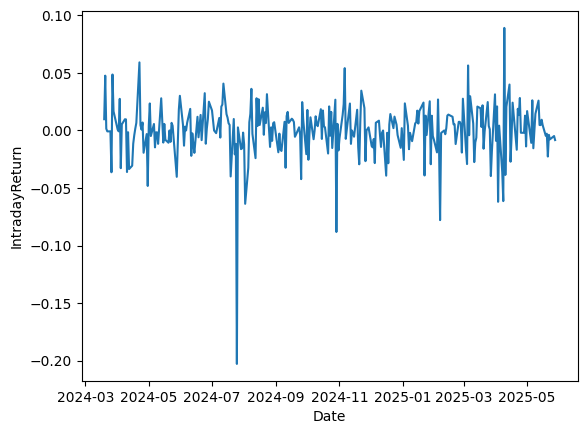

In [164]:
sns.lineplot(data = df3, x = "Date", y = "IntradayReturn")

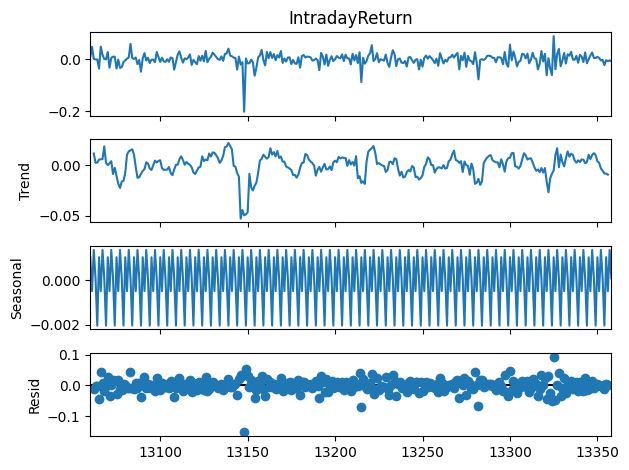

In [165]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df3["IntradayReturn"].dropna(), model="additive", period=5)
decomposition.plot()
plt.show()

# Augmented Dickey Fuller

In [166]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['Close'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -2.588646190540009
p-value: 0.09536664789806187
Used lags: 2
Number of observations: 297
Critical Values:
   1%: -3.4525611751768914
   5%: -2.87132117782556
   10%: -2.5719816428028888


In [167]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['IntradayReturn'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -11.71167302853164
p-value: 1.4838827821227709e-21
Used lags: 1
Number of observations: 297
Critical Values:
   1%: -3.4525611751768914
   5%: -2.87132117782556
   10%: -2.5719816428028888


The p-value is 0.0 (much less than 0.05).
Thus series is stationary.

In [168]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['Return'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -8.977952796964058
p-value: 7.443209598898607e-15
Used lags: 3
Number of observations: 296
Critical Values:
   1%: -3.452636878592149
   5%: -2.8713543954331433
   10%: -2.5719993576515705


In [169]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['DailyReturn'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -11.773664742308505
p-value: 1.0750699726296016e-21
Used lags: 1
Number of observations: 297
Critical Values:
   1%: -3.4525611751768914
   5%: -2.87132117782556
   10%: -2.5719816428028888


# RNN

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

train = df3['IntradayReturn']

# Example: assuming `train` is a Pandas Series
series = train.dropna().values.reshape(-1, 1)

# Scale data to [0,1]
scaler = MinMaxScaler()
scaled_series = scaler.fit_transform(series)

# Convert to sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_sequences(scaled_series, window_size)

# Train-test split
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0468 - val_loss: 0.0035
Epoch 2/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - val_loss: 0.0033
Epoch 3/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 4/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025 - val_loss: 0.0033
Epoch 5/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - val_loss: 0.0033
Epoch 6/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026 - val_loss: 0.0033
Epoch 7/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 8/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 9/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026 - val_loss: 0.0032
Epoch 10/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0028 - val_loss: 0.0032
Epoch 11/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - val_loss: 0.0037
Epoch 12/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step
RMSE: 0.0248
MAE: 0.0168
Directional Accuracy: 49.16%
R²: -0.1657


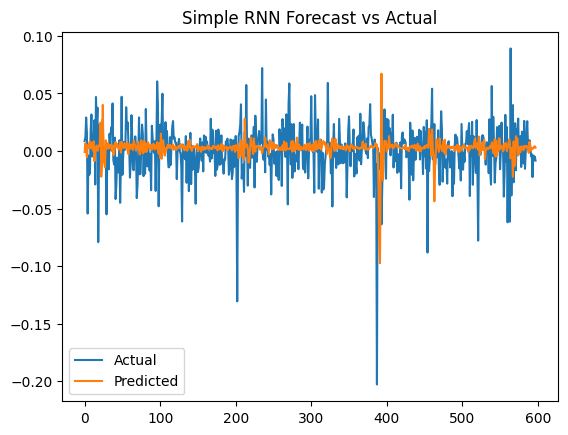

In [18]:
# Predict
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_orig = scaler.inverse_transform(y_test)

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
mae = mean_absolute_error(y_test_orig, y_pred)
directional_accuracy = (np.sign(y_test_orig.flatten()) == np.sign(y_pred.flatten())).mean()
r2_forecast = r2_score(y_test_orig, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Directional Accuracy: {directional_accuracy:.2%}")
print(f'R²: {r2_forecast:.4f}')


y_actual = y_test_orig


import matplotlib.pyplot as plt

plt.plot(y_test_orig, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Simple RNN Forecast vs Actual")
plt.show()
